In [23]:
import pandas as pd
import numpy as np
%matplotlib inline 
#import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
x = np.random.random((3,4))
x

array([[ 0.68245856,  0.24574824,  0.31227426,  0.29415755],
       [ 0.23193119,  0.08099216,  0.23201419,  0.75170338],
       [ 0.23615474,  0.9778953 ,  0.83367206,  0.75026058]])

In [10]:
x.mean()
len(x)

3

(array([   3.,    5.,   30.,   86.,   96.,  120.,   80.,   55.,   18.,    7.]),
 array([ 215. ,  221.6,  228.2,  234.8,  241.4,  248. ,  254.6,  261.2,
         267.8,  274.4,  281. ]),
 <a list of 10 Patch objects>)

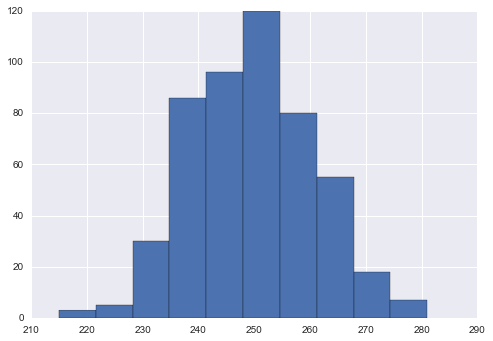

In [22]:
# 1. with loop
a=[]
for i in range(500):
    b = np.random.binomial(500, .5)
    a.append(b)
    
# 2. with List
a= [np.random.binomial(500, .5) for i in range(500)]

#3. with numpy
a= np.random.binomial(500,0.5, size=500)

sns.plt.hist(a, bins=10)    

In [4]:
data1 = pd.read_csv('C:/Users/ssssa/Desktop/CS109/lahman/Salaries.csv')
data2 = pd.read_csv('C:/Users/ssssa/Desktop/CS109/lahman/Teams.csv')    
    

In [11]:
data1.head()   

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [12]:
data2.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [7]:
sal1= data1.groupby(['teamID', 'yearID'])['salary'].sum()

In [20]:
sal1= pd.DataFrame(sal1).reset_index()
sal1.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


In [21]:
merged=pd.merge(sal1, data2, on=['teamID','yearID'])   


In [22]:
merged.columns

Index([u'teamID', u'yearID', u'salary', u'lgID', u'franchID', u'divID',
       u'Rank', u'G', u'Ghome', u'W', u'L', u'DivWin', u'WCWin', u'LgWin',
       u'WSWin', u'R', u'AB', u'H', u'2B', u'3B', u'HR', u'BB', u'SO', u'SB',
       u'CS', u'HBP', u'SF', u'RA', u'ER', u'ERA', u'CG', u'SHO', u'SV',
       u'IPouts', u'HA', u'HRA', u'BBA', u'SOA', u'E', u'DP', u'FP', u'name',
       u'park', u'attendance', u'BPF', u'PPF', u'teamIDBR', u'teamIDlahman45',
       u'teamIDretro'],
      dtype='object')

In [78]:
df = merged[merged['yearID'] == 2000]
df.head(3)

,teamID,yearID,salary,lgID,franchID,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
3,ANA,2000,51464167,AL,ANA,W,3,162,81.0,82,...,184.0,0.97,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA
10,ARI,2000,81027833,NL,ARI,W,3,162,81.0,85,...,138.0,0.98,Arizona Diamondbacks,Bank One Ballpark,2942251.0,105,103,ARI,ARI,ARI
39,ATL,2000,84537836,NL,ATL,E,1,162,81.0,95,...,138.0,0.97,Atlanta Braves,Turner Field,3234304.0,101,99,ATL,ATL,ATL


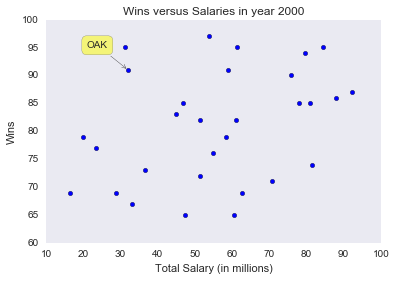

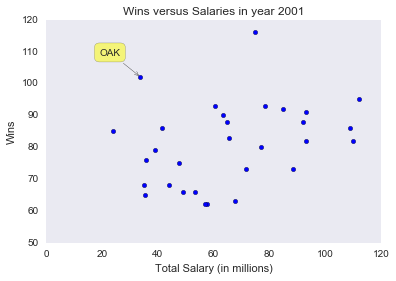

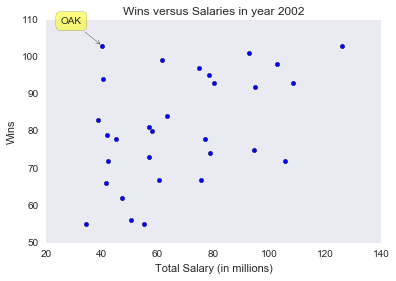

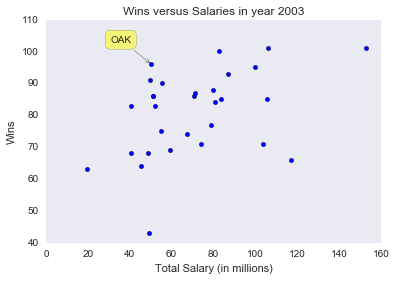

In [90]:
teamName = 'OAK'
years = np.arange(2000, 2004)

for yr in years: 
    df = merged[merged['yearID'] == yr]  #selecting the particular year. A year has many wins and salaries. 
    plt.scatter(df['salary'] / 1e6, df['W'])
    plt.title('Wins versus Salaries in year ' + str(yr))
    plt.xlabel('Total Salary (in millions)')
    plt.ylabel('Wins')
    plt.grid()
    plt.annotate(teamName, 
        xy = (df['salary'][df['teamID'] == teamName] / 1e6,  df['W'][df['teamID'] == teamName]), 
        xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0'))       
    plt.show()

In [91]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

teamID,ANA,ARI,ATL,BAL,BOS,CHA,CHN,CIN,CLE,COL,...,OAK,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR
1999,-12.815648,12.613389,14.090630,-13.472197,8.400638,2.402954,-18.203053,20.539111,8.146082,-13.063285,...,14.810819,2.318430,5.719566,-6.886459,-3.382038,6.202787,-5.889897,-8.145411,4.865170,4.597799
2000,1.695563,0.131503,9.589626,-10.933275,0.608153,17.834225,-16.705468,5.405246,5.926110,0.206248,...,13.704880,-14.662805,-7.825340,-4.822668,9.545298,16.344554,13.153346,-13.049088,-12.288887,3.718464
2001,-2.925391,7.736789,2.580021,-18.312122,-6.475081,2.016329,7.174629,-12.170282,5.374796,-8.977470,...,26.391198,9.065650,-17.651414,2.484426,33.485852,9.416959,9.841484,-17.519615,-11.862512,-2.881301
2002,19.685976,7.822092,13.452166,-11.989368,1.356053,2.920130,-16.006617,3.092842,-9.857422,-5.026529,...,29.426754,1.681653,-2.186362,-7.948827,8.779583,11.303723,14.265641,-17.086560,-18.893241,-5.316818
2003,-5.582871,1.092407,12.980497,-10.553130,8.238596,9.015522,5.249973,-9.651842,-8.499958,-6.214983,...,19.165197,5.065713,-2.744157,-11.825707,8.833309,16.653839,1.467137,-7.715129,-16.469686,8.963777
2004,4.030574,-30.102703,10.342002,0.951479,4.054755,2.917295,3.257714,0.069682,6.815117,-12.134655,...,12.209377,-0.269040,-0.717922,9.111613,-20.722908,7.164708,20.894726,-2.121484,11.186281,-9.689859


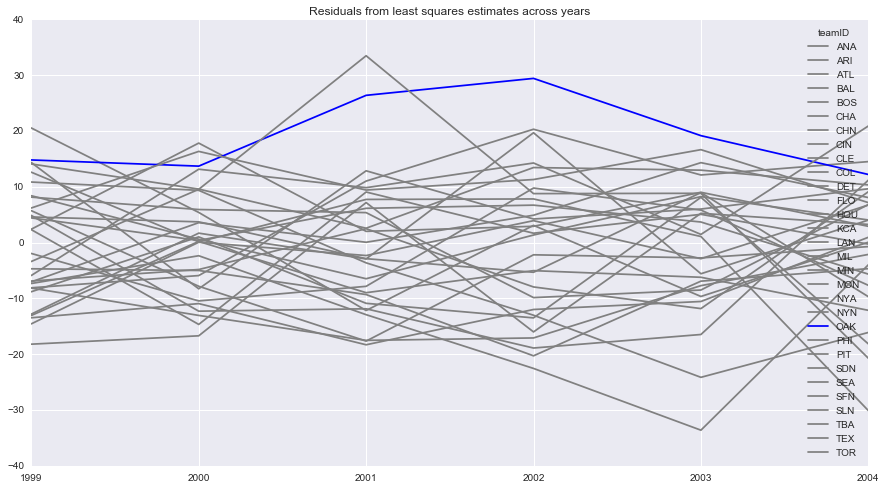

In [170]:
yr= np.arange(1999,2005)
pr=pd.DataFrame()

for i in yr:
    data= merged[merged['yearID']==i]
    salry= data.salary.values/1e6
    win=data.W.values
    
    model= reg.fit(salry.reshape(len(salry), 1),win)
    pred=model.predict(salry.reshape(len(salry),1))
    pr[i]= win-pred
    
pr=pd.DataFrame(pr)
pr.index=data['teamID']
pr =pr.T
pr.index=pr.index.format()
pr.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
                color=map(lambda x: 'blue' if x=='OAK' else 'gray', data.teamID))
pr

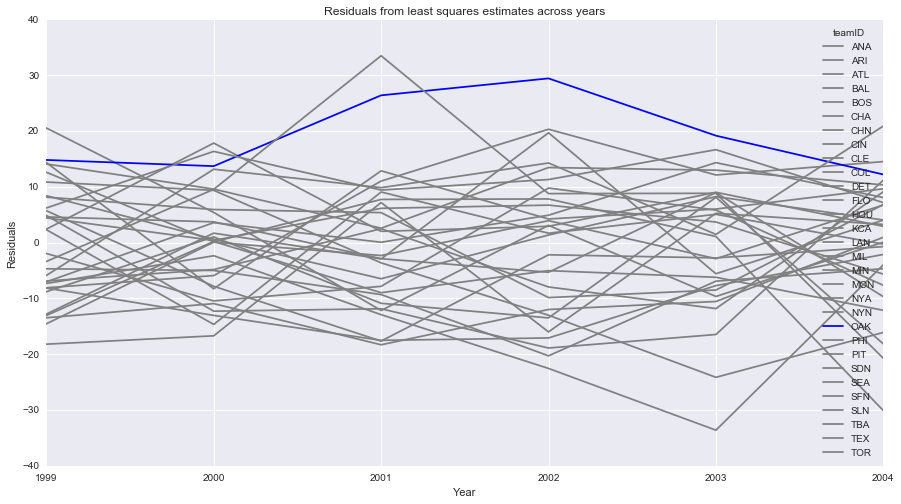

In [171]:
teamName = 'OAK'
years = np.arange(1999, 2005)
residData = pd.DataFrame()
joined=merged
for yr in years: 
    df = joined[joined['yearID'] == yr]
    x_list = df['salary'].values / 1e6
    y_list = df['W'].values

    # least squares estimates
    A = np.array([x_list, np.ones(len(x_list))])
    y = y_list
    w = np.linalg.lstsq(A.T,y)[0] # coefficients
    yhat = (w[0]*x_list+w[1]) # regression line
    residData[yr] = y - yhat
  
residData.index = df['teamID']
residData = residData.T
residData.index = residData.index.format()

residData.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'blue' if x=='OAK' else 'gray',df.teamID))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()


In [177]:
import StringIO
import requests
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s = StringIO.StringIO(requests.get(url).content)
countries = pd.read_csv(s)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [231]:
income_link = 'https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls'
source = StringIO.StringIO(requests.get(income_link).content)

In [232]:
income = pd.read_excel(source)
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [200]:
new= income
new=new.set_index('GDP per capita', inplace=True)
new.columns= map(lambda x: int(x), new.columns)
new= new.T
new.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [306]:
another=income
another=pd.DataFrame(another)

In [307]:
another.index= another[another.columns[0]]
another=another.drop(another.columns[0],axis=1)
another.columns= map(lambda x: int(x), another.columns)
another=another.T
another.head(3)

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN


In [340]:
p=another

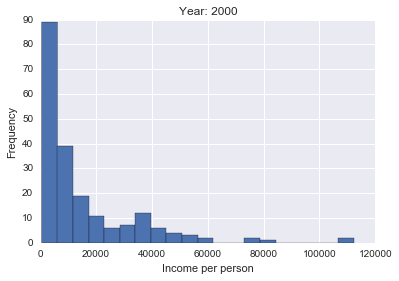

In [343]:
b=p.ix[2000].dropna().values
plt.hist(b,bins=20)
plt.title('Year: %i' % 2000)
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()

In [362]:
renam=income
renam=renam.rename(columns = {'GDP per capita':'Country'})
rename= renam.merge(countries, on='Country')
rename.head(3)

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region
0,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0,ASIA
1,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0,EUROPE
2,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0,AFRICA


In [372]:
def mergeByYear(year):
    rename= renam.merge(countries, on='Country')
    a= rename[['Country','Region',year]]
    a= a.rename(columns={year:'Income'})
    return a

In [374]:
mergeByYear(2000).head(3)

,Country,Region,Income
0,Afghanistan,ASIA,962.0
1,Albania,EUROPE,5305.0
2,Algeria,AFRICA,9885.0


In [414]:
def mergeByYear(year):
    f= pd.DataFrame(another.ix[year].values, columns=['Income'])
    f['Country']=another.columns.values
    joined = pd.merge(f, countries, how='inner', on=['Country'])
    return joined    
mergeByYear(2000).head(3)

,Income,Country,Region
0,962.0,Afghanistan,ASIA
1,5305.0,Albania,EUROPE
2,9885.0,Algeria,AFRICA


In [452]:
a= rename[2000]
a=pd.DataFrame(a)
b= rename.Region
b=pd.DataFrame(b)
print a.shape, b.shape


(176, 1) (176, 1)


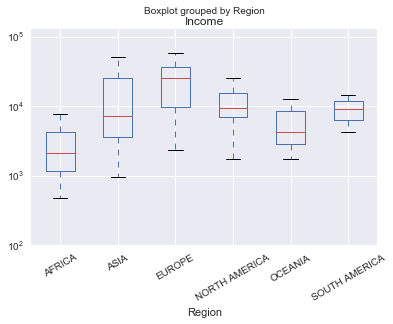

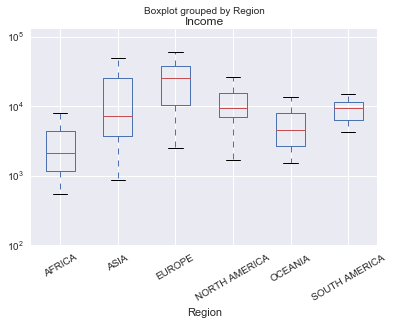

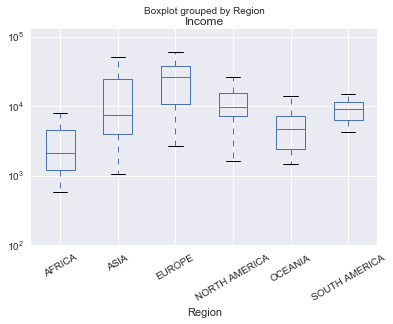

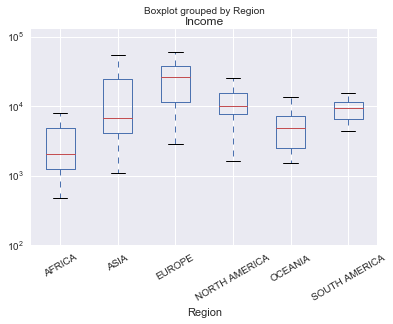

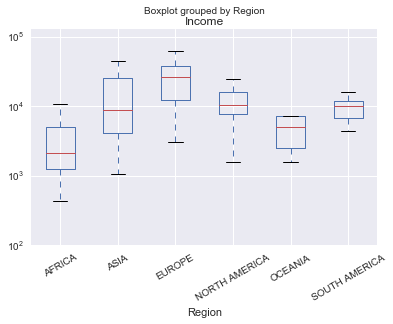

In [458]:
year= np.arange(2000,2005)
for yr in (year):
    sd= mergeByYear(yr)
    sd.boxplot('Income', by='Region', rot=30)
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')

In [501]:
merged = mergeByYear(2012).groupby('Region', as_index=False).mean()
merged = merged.loc[(merged.Region == "ASIA") | (merged.Region == "SOUTH AMERICA")]
merged

,Region,Income
1,ASIA,23500.432432
5,SOUTH AMERICA,13015.750000


In [525]:
avg= mergeByYear(2012)
a=avg[avg['Region']=='ASIA']
x=a.Income.mean()
b=avg[avg['Region']=='SOUTH AMERICA']
y=b.Income.mean()
x, y

(23500.432432432433, 13015.75)

In [524]:
av= avg.groupby('Region')['Income'].mean().reset_index()
first= av.ix[(av.Region=='ASIA')|(av.Region=='SOUTH AMERICA')]
second=pd.DataFrame(first)
second

,Region,Income
1,ASIA,23500.432432
5,SOUTH AMERICA,13015.750000


In [544]:
box=mergeByYear(2012)
a= box.ix[(box.Region =='ASIA')|(box.Region =='SOUTH AMERICA')]
a.head(5)

,Income,Country,Region
0,1893.0,Afghanistan,ASIA
6,17101.0,Argentina,SOUTH AMERICA
12,40732.0,Bahrain,ASIA
13,2725.0,Bangladesh,ASIA
19,7138.0,Bhutan,ASIA


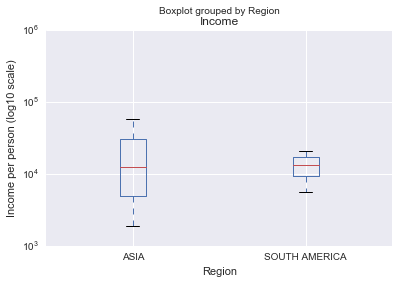

In [552]:
a.boxplot('Income', by='Region')
plt.ylabel('Income per person (log10 scale)')
plt.yscale('log')

In [577]:
income_p = mergeByYear(2012)
c= income_p[income_p.Income>10000]
d= c.groupby('Region')['Income'].mean()
f= c['Country'].value_counts()
e= d.values/len(income_p.Income)
e

array([ 100.71193182,  213.03436147,  194.37407862,  122.14160839,
        144.78835227,   86.81186869])